In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class Wheel:
    def __init__(self):
        self.wheel = {
            0: "g",
            32: "r",
            15: "b",
            19: "r",
            4: "b",
            21: "r",
            2: "b",
            25: "r",
            17: "b",
            34: "r",
            6: "b",
            27: "r",
            13: "b",
            36: "",
            11: "b",
            30: "r",
            8: "b",
            23: "r",
            10: "b",
            5: "r",
            24: "b",
            16: "r",
            33: "b",
            1: "r",
            20: "b",
            14: "r",
            31: "b",
            9: "r",
            22: "b",
            18: "r",
            29: "b",
            7: "r",
            28: "b",
            12: "r",
            35: "b",
            3: "r",
            26: "b",
        }
    
    # return a tuple containing a random integer from 0 to 36 inclusive and the corresponding color
    def spin(self):
        i = random.randint(0, 36)
        return (i, self.wheel[i])
    

In [3]:
class Roulette:
    def __init__(self, starting_amount):
        self.balance = [starting_amount]
        self.wheel = Wheel()
    
    # takes an array of bets represented by tuples: (bet_type, amount, bet_numbers)
    # updates balance
    def bet(self, bets, print_outcome=False):
        if self.balance[-1] <= 0:
            return
        winnings = 0
        (number, color) = self.wheel.spin()
        for (bet_type, amount, bet_numbers) in bets:
            if self.balance[-1] >= amount:
                winnings += self.validate_bet(bet_type, amount, number, color, bet_numbers)
        if print_outcome:
            print(winnings)
        if self.balance[-1] + winnings >= 0:
            self.balance.append(self.balance[-1] + winnings)
    
    # implements the Martingale betting strategy
    # Paramters:
    #     int init_bet: the size of the initial bet
    #     int iters: the number of times to run through the Martingale system
    #     Boolean limit: False for unlimited credit supply, True for realistic Martingale
    # updates balance
    # returns a numpy array with the number of spins in each iteration of the Martingale
    def bet_martingale(self, init_bet, iters, limit):
        spins = [] # number of spins until won bet or until bet size exceeds balance
        for i in range(iters):
            winnings = 0
            count = 0 # counts number of spins
            bet_size = init_bet
            while True:
                (number, color) = self.wheel.spin() # spin wheel
                count += 1 # increment spin count
                # break while loop if bet size exceeds balance
                if limit and bet_size > self.balance[-1] + winnings:
                    break
                # update winnings
                res = self.validate_bet("red", bet_size, number, color)
                winnings += res
                # check if bet won or lost
                if res > 0:
                    break
                # double bet size
                bet_size = bet_size * 2
            self.balance.append(self.balance[-1] + winnings)
            if limit and init_bet > self.balance[-1]:
                    break
            spins.append(count)
        return np.array(spins)
    
    # Parameters
    #     String bet_type: red, black, even, odd, low, high, first dozen, middle dozen, last dozen, column,
    #               line, corner, street, split, straight up
    #     int amount: size of the bet
    #     int number: number on the wheel
    #     String color: color of number on the wheel
    #     bet_numbers: N/A for red, black, even, odd, low, high, first dozen, middle dozen, last dozen;
    #                  set of integers for column, line, corner, street, split, straight up
    # Returns the payout of the bet (=-amount for a loss)
    def validate_bet(self, bet_type, amount, number, color, bet_numbers=set()):
        mult = -1
        
        if bet_type == "straight up":
            if number in bet_numbers:
                mult = 35
        elif number == 0:
            mult = -1
        elif bet_type == "red":
            if color == "r":
                mult = 1
        elif bet_type == "black":
            if color == "b":
                mult = 1
        elif bet_type == "even":
            if number % 2 == 0:
                mult = 1
        elif bet_type == "odd":
            if number % 2 != 0:
                mult = 1
        elif bet_type == "low":
            if number <= 18:
                mult = 1
        elif bet_type == "high":
            if number >= 19:
                mult = 1
        elif bet_type == "first dozen":
            if number <= 12:
                mult = 2
        elif bet_type == "middle dozen":
            if number >= 13 and number <= 24:
                mult = 2
        elif bet_type == "last dozen":
            if number >= 25:
                mult = 2
        elif bet_type == "column":
            if number in bet_numbers:
                mult = 2
        elif bet_type == "line":
            if number in bet_numbers:
                mult = 5
        elif bet_type == "corner":
            if number in bet_numbers:
                mult = 8
        elif bet_type == "street":
            if number in bet_numbers:
                mult = 11
        elif bet_type == "split":
            if number in bet_numbers:
                mult = 17
        else:
            print("Invalid Bet")
            return 0
        
        return mult * amount
    
    def display(self, print_curr_balance=True, print_balance_history=False):
        if print_curr_balance:
            print("Current balance: $" + str(self.balance[-1]))
        if print_balance_history:
            print("Balance history: " + str(self.balance))
        
        plt.plot(self.balance)
        

# Expected Value Demo

In [11]:
# Bet $1,000 on one spin one million times - average balance should be ~$973
num_games = 1000000
balances = np.zeros([num_games])

for i in range(num_games):
    game = Roulette(1000)
    game.bet([("straight up", 100, {3}), ("black", 400, set()), ("middle dozen", 500, set())])
    # add balance to np array
    balances[i] = game.balance[-1]

print("Highest Balance: $" + str(np.max(balances)))
print("Lowest Balance: $" + str(np.min(balances)))
print("Mean Balance: $" + str(np.average(balances)))
print("Median Balance: $" + str(np.median(balances)))

Highest Balance: $3600.0
Lowest Balance: $0.0
Mean Balance: $973.5453
Median Balance: $800.0


# Law of Large Numbers Demos

Bankrupt after 178 rounds.
Current balance: $0


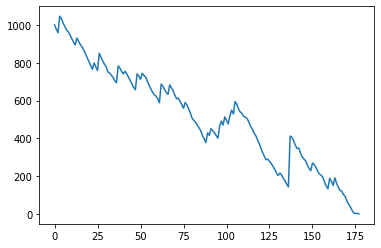

In [14]:
# starts a game of roulete with a balance of $1000. Shows balance as a function of spins played.
game = Roulette(1000)
for i in range(100000):
    game.bet([("high", 1, set()), ("straight up", random.randint(1,10), {3}),
              ("corner", random.randint(1,10), {5, 6, 8, 9}), ("street", random.randint(1,10), {16, 17, 18})])
    if game.balance[-1] == 0:
        print("Bankrupt after " + str(len(game.balance)) + " rounds.")
        break

game.display()

In [40]:
# Play 100 games of roulette, each game betting on 200 spins - average balance should be tiny
num_games = 100
balances = np.zeros([num_games])

# play roulette 10,000 times
for i in range(num_games):
    game = Roulette(100)
    # bet on 1,000 spins
    for j in range(200):
        game.bet([("straight up", 5, {2}), ("straight up", 6, {34}), ("middle dozen", 7, set())])
    # add balance to np array
    balances[i] = game.balance[-1]

print("Highest Balance: $" + str(np.max(balances)))
print("Lowest Balance: $" + str(np.min(balances)))
print("Mean Balance: $" + str(np.average(balances)))
print("Median Balance: $" + str(np.median(balances)))

Highest Balance: $2179.0
Lowest Balance: $1.0
Mean Balance: $212.2
Median Balance: $1.0


# Unlimited Martingale System

Most Number of Spins Until Win: 8
Fewest Number of Spins Until Win: 1
Mean Number of Spins Until Win: 2.41
Median Number of Spins Until Win: 2.0
Current balance: $2000


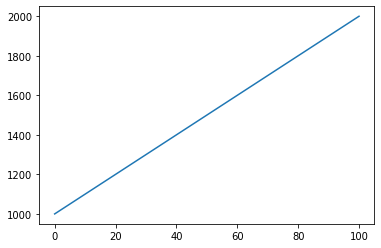

In [42]:
# start with $1000
# run the infinite Martingale system 1000 times with a $10 initial bet

game = Roulette(1000)
init_bet = 10
iters = 100
spins = game.bet_martingale(init_bet, iters, False)
print("Most Number of Spins Until Win: " + str(np.max(spins)))
print("Fewest Number of Spins Until Win: " + str(np.min(spins)))
print("Mean Number of Spins Until Win: " + str(np.mean(spins)))
print("Median Number of Spins Until Win: " + str(np.median(spins)))
game.display()

# Realistic Martingale System

Most Number of Spins Until Win/Loss: 12
Fewest Number of Spins Until Win/Loss: 1
Mean Number of Spins Until Win/Loss: 2.188267394270123
Median Number of Spins Until Win/Loss: 2.0
Current balance: $0
Bankrupt after 2199 iterations of the Martingale system.


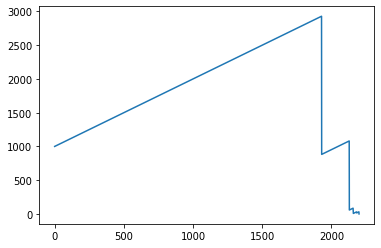

In [46]:
# start with $1000
# run the realistic Martingale system (cannot bet more than current balance) 1000 times with a $10 initial bet
game = Roulette(1000)
init_bet = 1
iters = 10000
spins = game.bet_martingale(init_bet, iters, True)
print("Most Number of Spins Until Win/Loss: " + str(np.max(spins)))
print("Fewest Number of Spins Until Win/Loss: " + str(np.min(spins)))
print("Mean Number of Spins Until Win/Loss: " + str(np.mean(spins)))
print("Median Number of Spins Until Win/Loss: " + str(np.median(spins)))
game.display()
if game.balance[-1] < init_bet:
    print("Bankrupt after " + str(len(spins)) + " iterations of the Martingale system.")